In [1]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
import progressbar
import dill as pickle
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import logging

sys.path = ["../../"] + sys.path

print(sys.path)

%autoreload 2
from pIMZ.regions import SpectraRegion, ProteinWeights
%autoreload 2
from pIMZ.imzml import IMZMLExtract
%autoreload 2
from pIMZ.comparative import CombinedSpectra

import pIMZ

print(pIMZ.__file__)



['../../', '/mnt/f/dev/git/pyIMS/examples/shibo_lipids_2020', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/mjoppich/.local/lib/python3.8/site-packages', '/home/mjoppich/.local/lib/python3.8/site-packages/pIMZ-1.0-py3.8-linux-x86_64.egg', '/home/mjoppich/.local/lib/python3.8/site-packages/progressbar-2.5-py3.8.egg', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/local/lib/python3.8/dist-packages/mpld3-0.3.1.dev1-py3.8.egg', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/mjoppich/.ipython']
../../pIMZ/__init__.py


In [2]:
!ls /mnt/f/dev/data/msi/ftp.lrz.de/transfer/BCA_Lipids_Markus_200228/

201020_BCA_Lipids.ibd  201020_BCA_Lipids.imzML	201020_BCA_Lipids.imzML.regions


In [3]:
imze = IMZMLExtract("/mnt/f/dev/data/msi/ftp.lrz.de/transfer/BCA_Lipids_Markus_200228/201020_BCA_Lipids.imzML")

Opening regions file for /mnt/f/dev/data/msi/ftp.lrz.de/transfer/BCA_Lipids_Markus_200228/201020_BCA_Lipids.imzML
1 819 907 635 696
2 1326 1415 570 628
3 1715 1812 558 602
4 2007 2043 554 579
5 2552 2622 565 619
6 2983 3037 591 651
7 3287 3374 615 661


1 ((819, 907, 635, 696), 5518)
2 ((1326, 1415, 570, 628), 5310)
3 ((1715, 1812, 558, 602), 4410)
4 ((2007, 2043, 554, 579), 962)
5 ((2552, 2622, 565, 619), 3851)
6 ((2983, 3037, 591, 651), 3355)
7 ((3287, 3374, 615, 661), 4136)


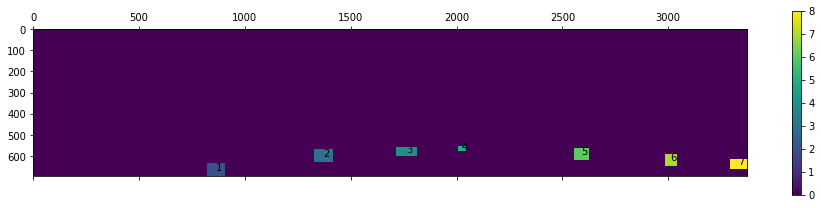

{1: ((819, 907, 635, 696), 5518),
 2: ((1326, 1415, 570, 628), 5310),
 3: ((1715, 1812, 558, 602), 4410),
 4: ((2007, 2043, 554, 579), 962),
 5: ((2552, 2622, 565, 619), 3851),
 6: ((2983, 3037, 591, 651), 3355),
 7: ((3287, 3374, 615, 661), 4136)}

In [4]:
imze.list_regions()

In [5]:
regionSpectra = {}
checkRegions = [1,2,5,6,7]

for regionID in checkRegions:
    spectra_orig = imze.get_region_array(regionID, makeNullLine=True)
    spectra_intra = imze.normalize_region_array(spectra_orig, normalize="intra_median")
    spectra = imze.normalize_region_array(spectra_intra, normalize="inter_median")
    
    regionSpectra[regionID] = spectra

Fetching region range
Fetching region shape
Found region 1 with shape (89, 62, 51600)
Fetching region spectra
100% |########################################################################|
100% |########################################################################|
Started Log Value: 0.11700288951396942
100% |########################################################################|
Got 4609 median-enabled pixels
5-Number stats for medians: (5518, 4609, 0.0, 0.5468366410416662, 0.5958262061146012, 0.6438766127632596, 1.1967335789144773)
Started Log Value: 0.19088494777679443
100% |########################################################################|
Got a total of 284728800 fold changes
Median elements [142364400]
Median elements
Global Median 0.57484
Fetching region range
Fetching region shape
Found region 2 with shape (90, 59, 51600)
Fetching region spectra
100% |########################################################################|
100% |###################################

1


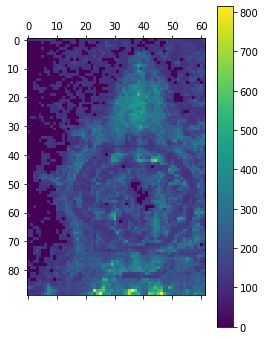

2


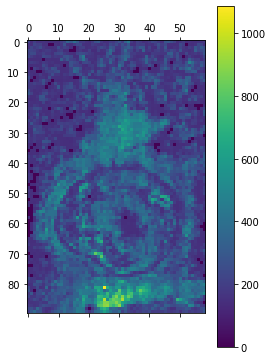

5


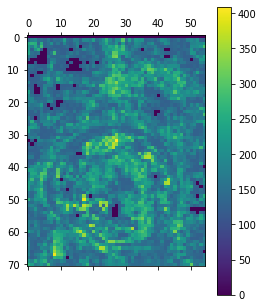

6


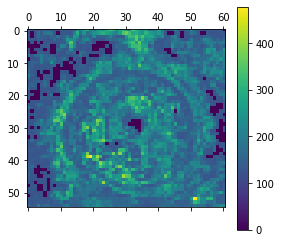

7


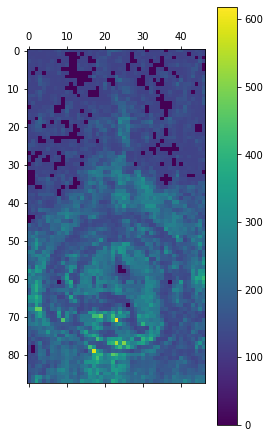

In [7]:
for regionID in checkRegions:
    print(regionID)
    imze.plot_tnc(regionSpectra[regionID])

In [17]:
help(spec.calculate_similarity)

Help on method calculate_similarity in module pIMZ.regions:

calculate_similarity(mode='spectra', features=[], neighbors=1) method of pIMZ.regions.SpectraRegion instance
    Returns similarity matrix.
    
    Args:
        mode (str, optional): Must be "spectra", "spectra_log" or "spectra_log_dist". Defaults to "spectra".
    
            - "spectra": Raw similarity matrix.
    
            - "spectra_log": Takes a logarithms and normalizes the similarity matrix by dividing by the maximum values.
    
            - "spectra_log_dist": Takes a logarithms, normalizes the similarity matrix by dividing by the maximum values and elementwise adds the distance matrix with 5% rate to the similarity matrix.
    
        features (list, optional): A list of desired masses. Defaults to [] meaning all masses.
        neighbors (int, optional): Number of neighboring masses to each feature to be included. Defaults to 1.
    
    Returns:
        numpy.array: Spectra similarity matrix



In [8]:
spec = SpectraRegion(regionSpectra[1], imze.mzValues)

In [9]:
spec.calculate_similarity(mode="spectra_log_dist")

2020-11-19 00:03:25,358  SpectraRegion  INFO: dimensions inputarray: 51600
2020-11-19 00:03:25,359  SpectraRegion  INFO: Creating C++ obj
2020-11-19 00:03:25,359  SpectraRegion  INFO: 51600 (89, 62, 51600)
2020-11-19 00:03:25,359  SpectraRegion  INFO: dimensions 51600
2020-11-19 00:03:25,360  SpectraRegion  INFO: input dimensions (89, 62, 51600)
2020-11-19 00:03:25,360  SpectraRegion  INFO: Switching to dot mode
2020-11-19 00:03:25,796  SpectraRegion  INFO: Starting calc similarity c++
2020-11-19 00:05:25,798  SpectraRegion  INFO: outclust dimensions (5518, 5518)
2020-11-19 00:05:25,809  SpectraRegion  INFO: Calculating spectra similarity
2020-11-19 00:05:26,150  SpectraRegion  INFO: Calculating spectra similarity done
2020-11-19 00:05:26,151  SpectraRegion  INFO: Calculating dist pixel map
2020-11-19 00:08:02,316  SpectraRegion  INFO: Calculating dist pixel map done


array([[0.94999999, 0.9138309 , 0.91489111, ..., 0.58390393, 0.55188396,
        0.61489861],
       [0.9138309 , 0.94999999, 0.92321082, ..., 0.63580073, 0.6017005 ,
        0.66005978],
       [0.91489111, 0.92321082, 0.94999999, ..., 0.63341754, 0.60025401,
        0.6591235 ],
       ...,
       [0.58390393, 0.63580073, 0.63341754, ..., 0.94999999, 0.94069554,
        0.93876229],
       [0.55188396, 0.6017005 , 0.60025401, ..., 0.94069554, 0.94999999,
        0.94064768],
       [0.61489861, 0.66005978, 0.6591235 , ..., 0.93876229, 0.94064768,
        0.94999999]])

In [10]:
spec.segment(method="WARD", number_of_regions=5)

2020-11-19 00:08:02,478  SpectraRegion  INFO: Calculating clusters
2020-11-19 00:08:03,514  SpectraRegion  INFO: Calculating clusters done
2020-11-19 00:08:03,594  SpectraRegion  INFO: Calculating clusters saved


array([[2, 2, 2, ..., 2, 2, 5],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [5, 5, 2, ..., 5, 5, 3],
       [2, 2, 2, ..., 5, 5, 3],
       [2, 2, 2, ..., 3, 3, 3]], dtype=int16)

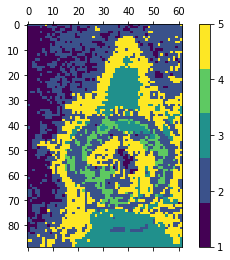

In [11]:
spec.plot_segments()

1


2020-11-19 00:08:04,436  SpectraRegion  INFO: dimensions inputarray: 51600
2020-11-19 00:08:04,437  SpectraRegion  INFO: Creating C++ obj
2020-11-19 00:08:04,437  SpectraRegion  INFO: 51600 (89, 62, 51600)
2020-11-19 00:08:04,438  SpectraRegion  INFO: dimensions 51600
2020-11-19 00:08:04,438  SpectraRegion  INFO: input dimensions (89, 62, 51600)
2020-11-19 00:08:04,438  SpectraRegion  INFO: Switching to dot mode
2020-11-19 00:08:04,898  SpectraRegion  INFO: Starting calc similarity c++
2020-11-19 00:10:10,562  SpectraRegion  INFO: outclust dimensions (5518, 5518)
2020-11-19 00:10:10,564  SpectraRegion  INFO: Calculating spectra similarity
2020-11-19 00:10:10,902  SpectraRegion  INFO: Calculating spectra similarity done
2020-11-19 00:10:10,903  SpectraRegion  INFO: Calculating dist pixel map
2020-11-19 00:12:44,860  SpectraRegion  INFO: Calculating dist pixel map done
2020-11-19 00:12:44,972  SpectraRegion  INFO: Calculating clusters
2020-11-19 00:12:45,977  SpectraRegion  INFO: Calcula

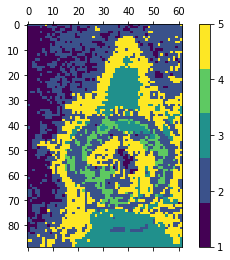

2


2020-11-19 00:12:46,837  SpectraRegion  INFO: dimensions inputarray: 51600
2020-11-19 00:12:46,838  SpectraRegion  INFO: Creating C++ obj
2020-11-19 00:12:46,838  SpectraRegion  INFO: 51600 (90, 59, 51600)
2020-11-19 00:12:46,838  SpectraRegion  INFO: dimensions 51600
2020-11-19 00:12:46,839  SpectraRegion  INFO: input dimensions (90, 59, 51600)
2020-11-19 00:12:46,839  SpectraRegion  INFO: Switching to dot mode
2020-11-19 00:12:47,256  SpectraRegion  INFO: Starting calc similarity c++
2020-11-19 00:14:36,320  SpectraRegion  INFO: outclust dimensions (5310, 5310)
2020-11-19 00:14:36,323  SpectraRegion  INFO: Calculating spectra similarity
2020-11-19 00:14:36,706  SpectraRegion  INFO: Calculating spectra similarity done
2020-11-19 00:14:36,707  SpectraRegion  INFO: Calculating dist pixel map
2020-11-19 00:16:59,734  SpectraRegion  INFO: Calculating dist pixel map done
2020-11-19 00:16:59,841  SpectraRegion  INFO: Calculating clusters
2020-11-19 00:17:00,672  SpectraRegion  INFO: Calcula

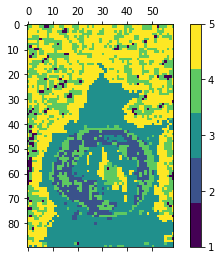

5


2020-11-19 00:17:01,324  SpectraRegion  INFO: dimensions inputarray: 51600
2020-11-19 00:17:01,325  SpectraRegion  INFO: Creating C++ obj
2020-11-19 00:17:01,325  SpectraRegion  INFO: 51600 (71, 55, 51600)
2020-11-19 00:17:01,326  SpectraRegion  INFO: dimensions 51600
2020-11-19 00:17:01,326  SpectraRegion  INFO: input dimensions (71, 55, 51600)
2020-11-19 00:17:01,327  SpectraRegion  INFO: Switching to dot mode
2020-11-19 00:17:01,649  SpectraRegion  INFO: Starting calc similarity c++
2020-11-19 00:18:03,482  SpectraRegion  INFO: outclust dimensions (3905, 3905)
2020-11-19 00:18:03,488  SpectraRegion  INFO: Calculating spectra similarity
2020-11-19 00:18:03,572  SpectraRegion  INFO: Calculating spectra similarity done
2020-11-19 00:18:03,573  SpectraRegion  INFO: Calculating dist pixel map
2020-11-19 00:19:21,220  SpectraRegion  INFO: Calculating dist pixel map done
2020-11-19 00:19:21,281  SpectraRegion  INFO: Calculating clusters
2020-11-19 00:19:21,903  SpectraRegion  INFO: Calcula

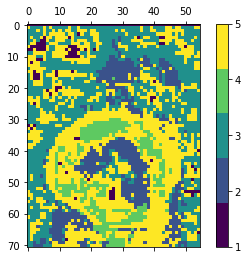

6


2020-11-19 00:19:22,488  SpectraRegion  INFO: dimensions inputarray: 51600
2020-11-19 00:19:22,489  SpectraRegion  INFO: Creating C++ obj
2020-11-19 00:19:22,490  SpectraRegion  INFO: 51600 (55, 61, 51600)
2020-11-19 00:19:22,490  SpectraRegion  INFO: dimensions 51600
2020-11-19 00:19:22,491  SpectraRegion  INFO: input dimensions (55, 61, 51600)
2020-11-19 00:19:22,491  SpectraRegion  INFO: Switching to dot mode
2020-11-19 00:19:22,778  SpectraRegion  INFO: Starting calc similarity c++
2020-11-19 00:20:09,080  SpectraRegion  INFO: outclust dimensions (3355, 3355)
2020-11-19 00:20:09,082  SpectraRegion  INFO: Calculating spectra similarity
2020-11-19 00:20:09,147  SpectraRegion  INFO: Calculating spectra similarity done
2020-11-19 00:20:09,148  SpectraRegion  INFO: Calculating dist pixel map
2020-11-19 00:21:06,158  SpectraRegion  INFO: Calculating dist pixel map done
2020-11-19 00:21:06,198  SpectraRegion  INFO: Calculating clusters
2020-11-19 00:21:06,712  SpectraRegion  INFO: Calcula

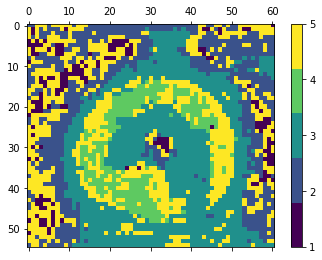

7


2020-11-19 00:21:07,365  SpectraRegion  INFO: dimensions inputarray: 51600
2020-11-19 00:21:07,366  SpectraRegion  INFO: Creating C++ obj
2020-11-19 00:21:07,367  SpectraRegion  INFO: 51600 (88, 47, 51600)
2020-11-19 00:21:07,367  SpectraRegion  INFO: dimensions 51600
2020-11-19 00:21:07,368  SpectraRegion  INFO: input dimensions (88, 47, 51600)
2020-11-19 00:21:07,369  SpectraRegion  INFO: Switching to dot mode
2020-11-19 00:21:07,766  SpectraRegion  INFO: Starting calc similarity c++
2020-11-19 00:22:19,088  SpectraRegion  INFO: outclust dimensions (4136, 4136)
2020-11-19 00:22:19,090  SpectraRegion  INFO: Calculating spectra similarity
2020-11-19 00:22:19,185  SpectraRegion  INFO: Calculating spectra similarity done
2020-11-19 00:22:19,186  SpectraRegion  INFO: Calculating dist pixel map
2020-11-19 00:23:45,666  SpectraRegion  INFO: Calculating dist pixel map done
2020-11-19 00:23:45,729  SpectraRegion  INFO: Calculating clusters
2020-11-19 00:23:46,373  SpectraRegion  INFO: Calcula

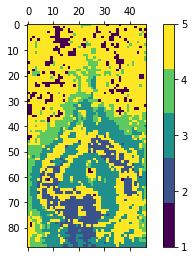

In [12]:
regionObjs = {}

for regionID in regionSpectra:
    print(regionID)
    sreg = SpectraRegion(regionSpectra[regionID], imze.mzValues)
    sreg.calculate_similarity(mode="spectra_log_dist")
    sreg.segment(method="WARD", number_of_regions=5)
    sreg.plot_segments()
    regionObjs[regionID] = sreg

In [28]:
help(sreg.filter_clusters)

Help on method filter_clusters in module pIMZ.regions:

filter_clusters(method='remove_singleton', bg_x=4, bg_y=4, minIslandSize=10) method of pIMZ.regions.SpectraRegion instance
    Filters the segmented array. 
    
    Args:
        method (str, optional): Possible methods: "remove_singleton", "most_similar_singleton", "merge_background", "remove_islands", "gauss".. Defaults to 'remove_singleton'.
    
            - "remove_singleton": If there are clusters that include only one pixel, they will be made a part of the background.
    
            - "most_similar_singleton": If there are clusters that include only one pixel, they will be compared to consensus spectra of all cluster and then added to the cluster with the lowest distance.
    
            - "merge_background": Collects cluster ids at the borders and assigns all findings with background id 0.
    
            - "remove_islands": Removes all pixel groups that include less then minimum allowed elements.
    
            - 

2020-11-19 00:23:50,429  SpectraRegion  INFO: Calculating clusters


1


2020-11-19 00:23:51,284  SpectraRegion  INFO: Calculating clusters done
2020-11-19 00:23:51,362  SpectraRegion  INFO: Calculating clusters saved
2020-11-19 00:23:51,366  SpectraRegion  INFO: Assigning clusters to background: {1, 3, 4, 5, 7, 9, 10, 12, 15}


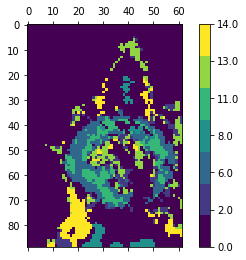

2020-11-19 00:23:51,615  SpectraRegion  INFO: Calculating clusters


2


2020-11-19 00:23:52,463  SpectraRegion  INFO: Calculating clusters done
2020-11-19 00:23:52,540  SpectraRegion  INFO: Calculating clusters saved
2020-11-19 00:23:52,543  SpectraRegion  INFO: Assigning clusters to background: {1, 4, 5, 11, 12, 13, 14, 15}


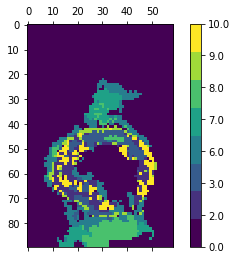

2020-11-19 00:23:52,771  SpectraRegion  INFO: Calculating clusters


5


2020-11-19 00:23:53,244  SpectraRegion  INFO: Calculating clusters done
2020-11-19 00:23:53,323  SpectraRegion  INFO: Calculating clusters saved
2020-11-19 00:23:53,325  SpectraRegion  INFO: Assigning clusters to background: {1, 3, 4, 5, 10, 11}


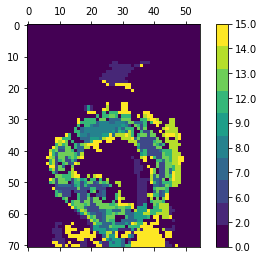

2020-11-19 00:23:53,538  SpectraRegion  INFO: Calculating clusters


6


2020-11-19 00:23:53,866  SpectraRegion  INFO: Calculating clusters done
2020-11-19 00:23:53,929  SpectraRegion  INFO: Calculating clusters saved
2020-11-19 00:23:53,931  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 6, 7, 13}


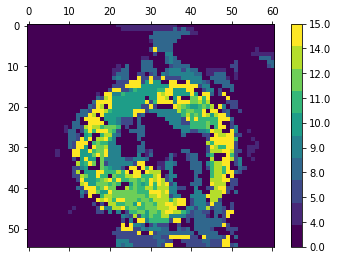

2020-11-19 00:23:54,129  SpectraRegion  INFO: Calculating clusters


7


2020-11-19 00:23:54,556  SpectraRegion  INFO: Calculating clusters done
2020-11-19 00:23:54,626  SpectraRegion  INFO: Calculating clusters saved
2020-11-19 00:23:54,629  SpectraRegion  INFO: Assigning clusters to background: {1, 5, 6, 9, 10, 14, 15}


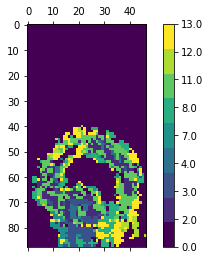

In [13]:
for regionID in regionObjs:
    print(regionID)
    sreg = regionObjs[regionID]
    sreg.segment(method="WARD", number_of_regions=15)
    sreg.filter_clusters(method="merge_background")
    sreg.filter_clusters(method="remove_islands")
    sreg.filter_clusters(method="gauss")
    sreg.plot_segments()

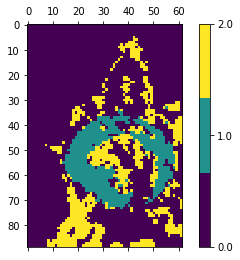

In [14]:
regionObjs[1].plot_segments(highlight=[13,14,8,2])

In [15]:
regionObjs[1].set_background([13,14,8,2])

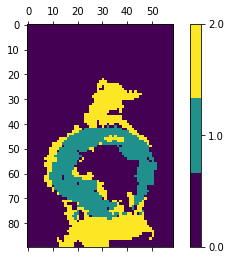

In [16]:
regionObjs[2].plot_segments(highlight=[6,7,8])

In [17]:
regionObjs[2].set_background([6,7,8])

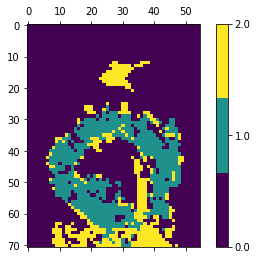

In [18]:
regionObjs[5].plot_segments(highlight=[2,15,9])

In [19]:
regionObjs[5].set_background([2,15,9])

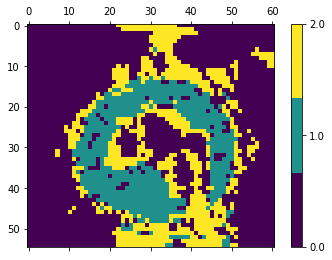

In [20]:
regionObjs[6].plot_segments(highlight=[4,5,8,9])

In [21]:
regionObjs[6].set_background([4,5,8,9])

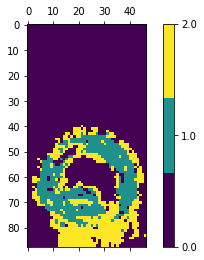

In [22]:
regionObjs[7].plot_segments(highlight=[12,13,7,8,3])

In [23]:
regionObjs[7].set_background([12,13,7,8,3])

1


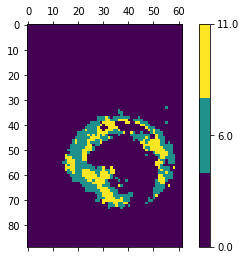

2


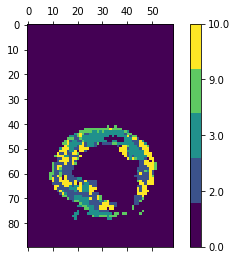

5


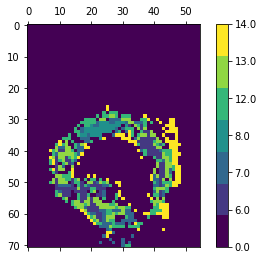

6


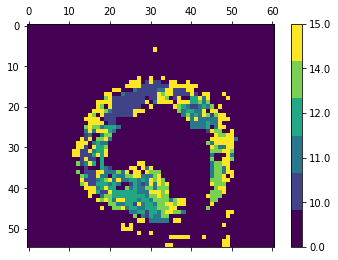

7


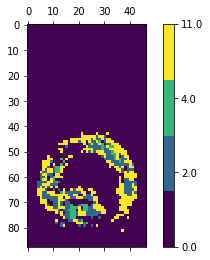

In [24]:
for regionID in regionObjs:
    print(regionID)
    sreg = regionObjs[regionID]
    sreg.plot_segments()

In [25]:
combSpec = CombinedSpectra(regionObjs)

In [26]:
combSpec.consensus_similarity()

2020-11-19 00:25:14,576  SpectraRegion  INFO: Calculating consensus spectra
2020-11-19 00:25:14,742  SpectraRegion  INFO: Setting consensus spectra
2020-11-19 00:25:14,742  SpectraRegion  INFO: Calculating consensus spectra done
2020-11-19 00:25:14,743  SpectraRegion  INFO: Calculating consensus spectra
2020-11-19 00:25:14,902  SpectraRegion  INFO: Setting consensus spectra
2020-11-19 00:25:14,903  SpectraRegion  INFO: Calculating consensus spectra done
2020-11-19 00:25:14,904  SpectraRegion  INFO: Calculating consensus spectra
2020-11-19 00:25:15,022  SpectraRegion  INFO: Setting consensus spectra
2020-11-19 00:25:15,022  SpectraRegion  INFO: Calculating consensus spectra done
2020-11-19 00:25:15,023  SpectraRegion  INFO: Calculating consensus spectra
2020-11-19 00:25:15,124  SpectraRegion  INFO: Setting consensus spectra
2020-11-19 00:25:15,124  SpectraRegion  INFO: Calculating consensus spectra done
2020-11-19 00:25:15,125  SpectraRegion  INFO: Calculating consensus spectra
2020-11-

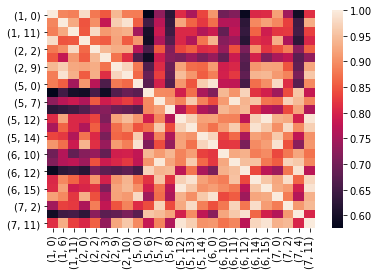

In [27]:
combSpec.plot_consensus_similarity()

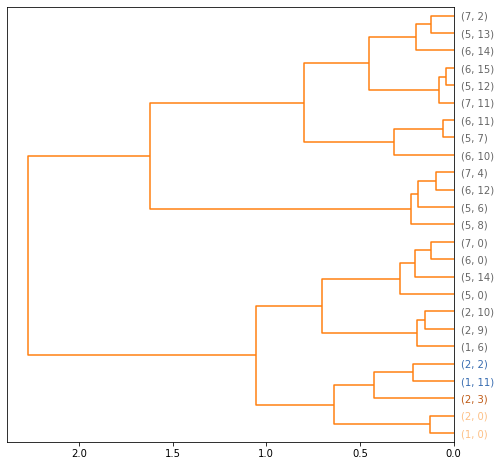

In [28]:
combSpec.cluster_concensus_spectra(number_of_clusters=10)

{0.0: 0.0, 1.1538461538461537: 2.0, 2.3076923076923075: 3.0, 3.4615384615384612: 4.0, 4.615384615384615: 6.0, 5.769230769230768: 7.0, 6.9230769230769225: 8.0, 8.076923076923077: 9.0, 9.23076923076923: 10.0, 10.384615384615383: 11.0, 11.538461538461537: 12.0, 12.692307692307692: 13.0, 13.846153846153845: 14.0, 15.0: 15.0}


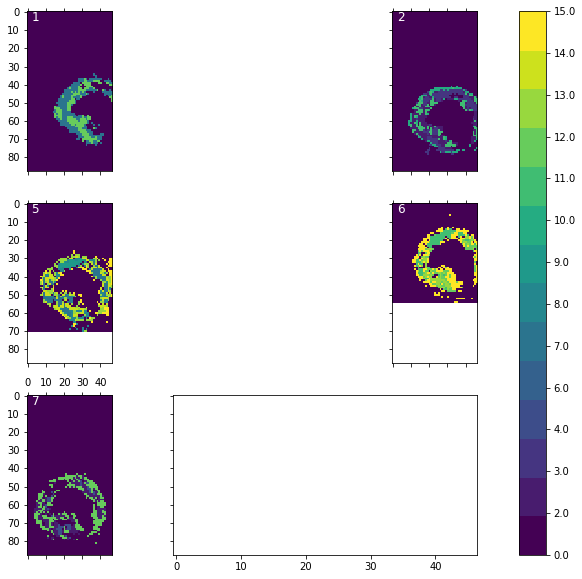

In [29]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.plot_segments()
mpl.rcParams['figure.figsize'] = (6,4)

2020-11-19 00:25:31,418  CombinedSpectra  INFO: Processing Mass 2000 with best existing mass 1999.9954271187703
2020-11-19 00:25:31,448  CombinedSpectra  INFO: Processing Mass 2000 with best existing mass 1999.9954271187703
2020-11-19 00:25:31,477  CombinedSpectra  INFO: Processing Mass 2000 with best existing mass 1999.9954271187703
2020-11-19 00:25:31,506  CombinedSpectra  INFO: Processing Mass 2000 with best existing mass 1999.9954271187703
2020-11-19 00:25:31,535  CombinedSpectra  INFO: Processing Mass 2000 with best existing mass 1999.9954271187703


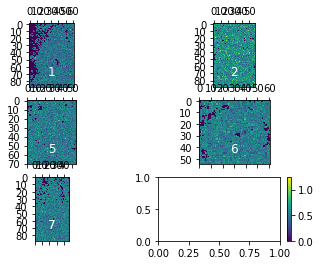

In [30]:
_ = combSpec.mass_heatmap(2000)

2020-11-19 00:25:37,844  SpectraRegion  INFO: Calculating consensus spectra
2020-11-19 00:25:45,137  SpectraRegion  INFO: Started Log Value: 0.3269729185358201
2020-11-19 00:25:46,814  SpectraRegion  INFO: Started Log Value: 0.36635540843644526
2020-11-19 00:25:48,222  SpectraRegion  INFO: Started Log Value: 0.34686835163483726
2020-11-19 00:25:48,225  SpectraRegion  INFO: Calculating consensus spectra done
2020-11-19 00:25:48,927  SpectraRegion  INFO: Calculating consensus spectra   |


[1, 2, 5, 6, 7]


2020-11-19 00:25:56,339  SpectraRegion  INFO: Started Log Value: 0.43704793166168454
2020-11-19 00:25:57,861  SpectraRegion  INFO: Started Log Value: 0.4529583548381743
2020-11-19 00:25:59,297  SpectraRegion  INFO: Started Log Value: 0.4587700557292057
2020-11-19 00:26:00,655  SpectraRegion  INFO: Started Log Value: 0.41452880370831036
2020-11-19 00:26:02,063  SpectraRegion  INFO: Started Log Value: 0.4314665895566934
2020-11-19 00:26:02,066  SpectraRegion  INFO: Calculating consensus spectra done
2020-11-19 00:26:02,913  CombinedSpectra  INFO: FiveNumber Stats for bgFoldChanges before: (51600, 51600, 0.3075117014893525, 0.7378099395649195, 0.7466168516285514, 0.7565917872954485, 0.9666900198499839)
2020-11-19 00:26:02,914  CombinedSpectra  INFO: scaleFactor: 0.7466168516285514
2020-11-19 00:26:03,807  SpectraRegion  INFO: Calculating consensus spectra
2020-11-19 00:26:11,427  SpectraRegion  INFO: Started Log Value: 0.3263073507480172
2020-11-19 00:26:12,896  SpectraRegion  INFO: Start

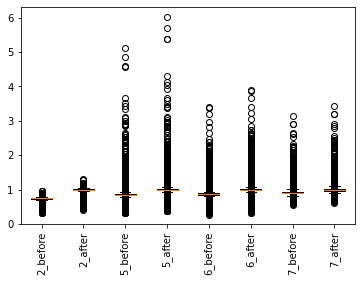

In [31]:
combSpec.get_internormed_regions()

In [36]:
help(combSpec.find_markers)

Help on method find_markers in module pIMZ.comparative:

find_markers(region0, clusters0, region1, clusters1, protWeights, use_methods=['empire', 'ttest', 'rank'], count_scale={'ttest': 1, 'rank': 1}, scaled=True, sample_max=-1) method of pIMZ.comparative.CombinedSpectra instance



In [56]:
sdfWeights, sdf_dict = ProteinWeights.from_sdf("../structures.sdf")

In [78]:
sdfWeights.print_collisions(0.01)

2020-11-19 11:35:30,704  ProteinWeights  INFO:          Number of total proteins: 44427
2020-11-19 11:35:30,704  ProteinWeights  INFO:          Number of total proteins: 44427
2020-11-19 11:35:30,705  ProteinWeights  INFO:            Number of total masses: 8526
2020-11-19 11:35:30,705  ProteinWeights  INFO:            Number of total masses: 8526
2020-11-19 11:35:30,706  ProteinWeights  INFO: Number of proteins with collision: 41428
2020-11-19 11:35:30,706  ProteinWeights  INFO: Number of proteins with collision: 41428
2020-11-19 11:35:30,716  ProteinWeights  INFO:         Mean Number of Collidings: 1.0940185381867336
2020-11-19 11:35:30,716  ProteinWeights  INFO:         Mean Number of Collidings: 1.0940185381867336
2020-11-19 11:35:30,727  ProteinWeights  INFO:       Median Number of Collidings: 1.0
2020-11-19 11:35:30,727  ProteinWeights  INFO:       Median Number of Collidings: 1.0
2020-11-19 11:35:30,735  ProteinWeights  INFO: Proteins with collision: [('LMGP04050020', 5), ('LMPK

In [93]:
resdf, expr, pdata = combSpec.find_markers(1, [6,11], 2, [2,3,9,10], sdfWeights, mz_dist=0.1, mz_best=True, use_methods=["ttest"], scaled=True)

2020-11-19 12:08:12,045  CombinedSpectra  INFO: DE data for case: 1 [6, 11]
2020-11-19 12:08:12,046  CombinedSpectra  INFO: DE data for control: 2 [2, 3, 9, 10]
2020-11-19 12:08:12,082  CombinedSpectra  INFO: Processing region 1 cluster: 6


Running 1 [6, 11] against 2 [2, 3, 9, 10]


100% |########################################################################|
2020-11-19 12:08:12,444  CombinedSpectra  INFO: Processing region 1 cluster: 11
100% |########################################################################|
2020-11-19 12:08:12,747  CombinedSpectra  INFO: Processing region 2 cluster: 2
100% |########################################################################|
2020-11-19 12:08:13,104  CombinedSpectra  INFO: Processing region 2 cluster: 3
100% |########################################################################|
2020-11-19 12:08:13,798  CombinedSpectra  INFO: Processing region 2 cluster: 9
100% |########################################################################|
2020-11-19 12:08:14,293  CombinedSpectra  INFO: Processing region 2 cluster: 10
100% |########################################################################|
2020-11-19 12:08:14,798  CombinedSpectra  INFO: DE DataFrame ready. Shape (51600, 1377)
2020-11-19 12:08:14,800  CombinedSp

{0.0: 0.0, 1.1538461538461537: 2.0, 2.3076923076923075: 3.0, 3.4615384615384612: 4.0, 4.615384615384615: 6.0, 5.769230769230768: 7.0, 6.9230769230769225: 8.0, 8.076923076923077: 9.0, 9.23076923076923: 10.0, 10.384615384615383: 11.0, 11.538461538461537: 12.0, 12.692307692307692: 13.0, 13.846153846153845: 14.0, 15.0: 15.0}


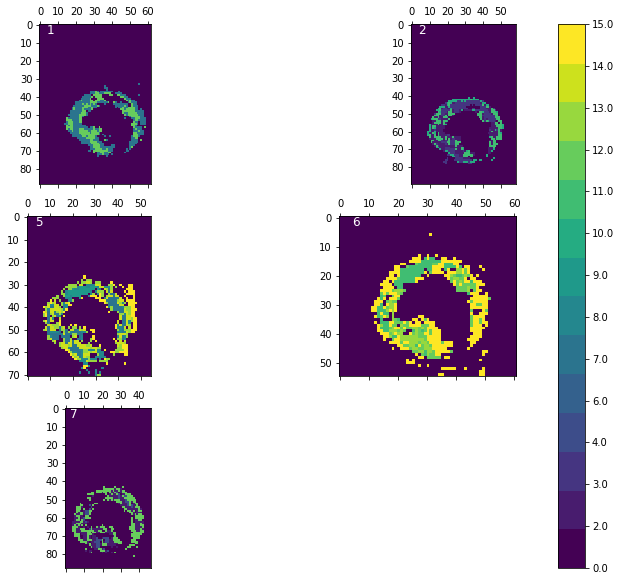

In [94]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.plot_segments()
mpl.rcParams['figure.figsize'] = (6,4)

In [95]:
mydf = resdf["ttest"][(1, (6,11,), 2, (2,3,9,10,))]

In [96]:
pd.set_option('display.max_rows', 100)
mydf

,clusterID,gene_ident,gene_mass,gene,protein_mass,avg_logFC,qvalue,num,anum,mean,median,num_bg,anum_bg,mean_bg,median_bg
0,1_6_11,mass_419_2300944295521,419.230094,LMFA13040126,419.194404,0.745559,1.747726e-43,674,671,0.728420,0.608348,703,703,1.221285,0.989693
1,1_6_11,mass_463_2373731815152,463.237373,LMFA04040006,463.239246,0.551797,1.355273e-23,674,671,2.224855,1.757179,703,703,3.261441,2.681460
2,1_6_11,mass_463_2800158934841,463.280016,LMGP02050016,463.269892,1.091148,1.217264e-44,674,671,0.958806,0.738811,703,703,2.042674,1.405227
3,1_6_11,mass_479_2283901698739,479.228390,LMFA04030016,479.234161,0.701170,1.168722e-28,674,671,3.483685,2.623050,703,703,5.663856,4.587006
4,1_6_11,mass_479_27103288184287,479.271033,LMPK11000002,479.267174,1.289223,2.483554e-38,674,671,1.027286,0.723119,703,703,2.510649,1.547232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,1_6_11,mass_1008_5950165525,1008.595017,LMGP15010041,1008.578658,0.639222,2.174714e-33,674,671,1.367557,1.138397,703,703,2.129956,1.814267
318,1_6_11,mass_1008_6803019764379,1008.680302,LMPR03020002,1008.718323,0.541403,7.236016e-43,674,671,0.895283,0.781257,703,703,1.302984,1.191375
319,1_6_11,mass_1051_6215129291772,1051.621513,LMSP0502AA02,1051.701869,0.574080,3.781454e-28,674,671,1.424934,1.179711,703,703,2.121342,1.761108
320,1_6_11,mass_1051_6641556411462,1051.664156,LMSP0502AA02,1051.701869,0.517281,2.242669e-25,674,671,0.890261,0.769954,703,703,1.274191,0.989039


2020-11-19 12:08:39,880  CombinedSpectra  INFO: Processing Mass 386 with best existing mass 399.91294590761476
2020-11-19 12:08:39,908  CombinedSpectra  INFO: Processing Mass 386 with best existing mass 399.91294590761476
2020-11-19 12:08:39,936  CombinedSpectra  INFO: Processing Mass 386 with best existing mass 399.91294590761476
2020-11-19 12:08:39,963  CombinedSpectra  INFO: Processing Mass 386 with best existing mass 399.91294590761476
2020-11-19 12:08:39,990  CombinedSpectra  INFO: Processing Mass 386 with best existing mass 399.91294590761476


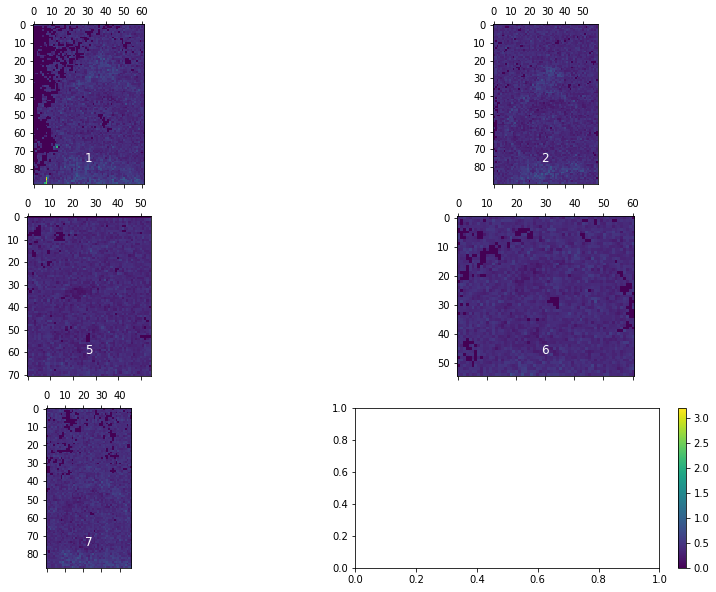

In [97]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.mass_heatmap(386, scaled=True)
mpl.rcParams['figure.figsize'] = (6,4)

2020-11-19 12:08:42,843  CombinedSpectra  INFO: Processing Mass 783.612068 with best existing mass 783.6120682042855
2020-11-19 12:08:42,865  CombinedSpectra  INFO: Processing Mass 783.612068 with best existing mass 783.6120682042855
2020-11-19 12:08:42,887  CombinedSpectra  INFO: Processing Mass 783.612068 with best existing mass 783.6120682042855
2020-11-19 12:08:42,907  CombinedSpectra  INFO: Processing Mass 783.612068 with best existing mass 783.6120682042855
2020-11-19 12:08:42,927  CombinedSpectra  INFO: Processing Mass 783.612068 with best existing mass 783.6120682042855


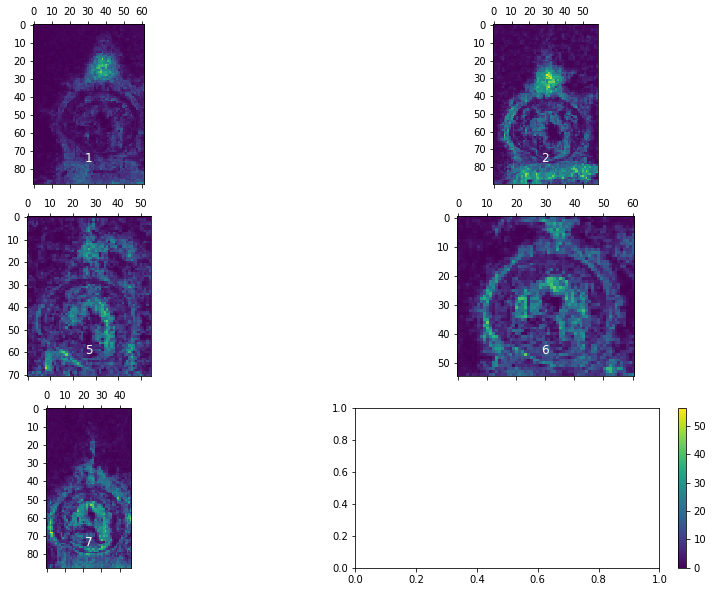

In [98]:
mpl.rcParams['figure.figsize'] = (15,10)
combSpec.mass_heatmap(783.612068, scaled=True)
mpl.rcParams['figure.figsize'] = (6,4)

2020-11-19 12:08:44,867  CombinedSpectra  INFO: Processing Mass 875.549755 with best existing mass 875.5497552093558


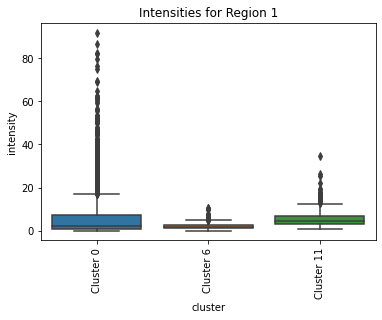

2020-11-19 12:08:44,965  CombinedSpectra  INFO: Processing Mass 875.549755 with best existing mass 875.5497552093558


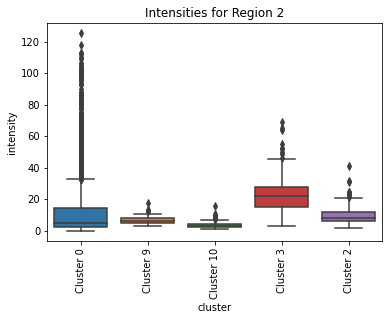

2020-11-19 12:08:45,080  CombinedSpectra  INFO: Processing Mass 875.549755 with best existing mass 875.5497552093558


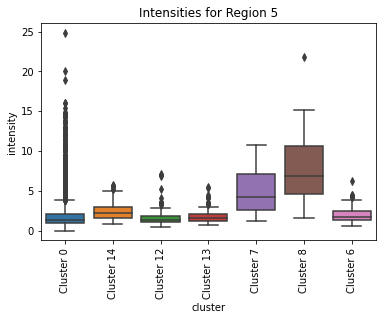

2020-11-19 12:08:45,217  CombinedSpectra  INFO: Processing Mass 875.549755 with best existing mass 875.5497552093558


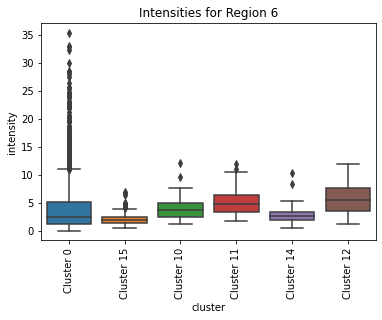

2020-11-19 12:08:45,342  CombinedSpectra  INFO: Processing Mass 875.549755 with best existing mass 875.5497552093558


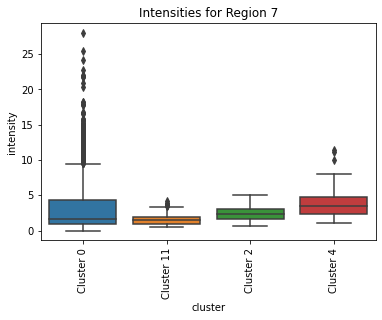

In [99]:
combSpec.mass_intensity(875.549755)

In [109]:
from scipy.stats import hypergeom
from statsmodels.stats.multitest import multipletests
from collections import defaultdict

In [100]:
significantGenes = set(mydf['gene'])

In [125]:
def hypergeom_test(pw_theo, testSets, print_df=True):
    
    data = np.zeros((len(testSets),7))
    populationSize = len(pw_theo.protein2mass)
    numSuccInPopulation = len(significantGenes)
    counter = 0
    
    elemData = defaultdict(list)
    
    for setElem in testSets:

        setData = testSets[setElem]
        sampleSize = len(setData)
        successIntersection = significantGenes.intersection(setData)
        drawnSuccesses = len(successIntersection)
        pval = hypergeom.sf(drawnSuccesses - 1, populationSize, numSuccInPopulation, sampleSize)
        fractionOfHitSamples = drawnSuccesses / sampleSize if sampleSize > 0 else 0

                    
        elemData["TestSet"].append(setElem)
        elemData["drawnSuccesses - 1"].append( drawnSuccesses - 1 )
        elemData["populationSize"].append( populationSize )
        elemData["numSuccInPopulation"].append( numSuccInPopulation )
        elemData["sampleSize"].append( sampleSize )
        elemData["pval"].append( pval )
        elemData["fractionOfHitSamples"].append( fractionOfHitSamples )
        elemData["successGenes"].append( successIntersection )

    
    outdf = pd.DataFrame.from_dict(data=elemData)
    outdf.set_index("TestSet")
    
    rej, elemAdjPvals, _, _ = multipletests(outdf.pval, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
    outdf["pval_adj"] = elemAdjPvals
    
    return outdf

In [128]:
cat2lipid = defaultdict(set)
for x in sdf_dict:
    if "MAIN_CLASS" in sdf_dict[x]:
        cat2lipid[ sdf_dict[x]["MAIN_CLASS"] ].add(x)

In [129]:
hgtest = hypergeom_test(sdfWeights, cat2lipid)
hgtest

,TestSet,drawnSuccesses - 1,populationSize,numSuccInPopulation,sampleSize,pval,fractionOfHitSamples,successGenes,pval_adj
0,Other Fatty Acyls [FA00],-1,44427,297,46,1.000000e+00,0.000000,{},1.000000e+00
1,Fatty Acids and Conjugates [FA01],1,44427,297,2782,9.999999e-01,0.000719,"{LMFA01031016, LMFA01031127}",1.000000e+00
2,Octadecanoids [FA02],-1,44427,297,609,1.000000e+00,0.000000,{},1.000000e+00
3,Eicosanoids [FA03],0,44427,297,1187,9.996874e-01,0.000842,{LMFA03020006},1.000000e+00
4,Docosanoids [FA04],1,44427,297,1142,9.962107e-01,0.001751,"{LMFA04030016, LMFA04040006}",1.000000e+00
5,Fatty alcohols [FA05],-1,44427,297,454,1.000000e+00,0.000000,{},1.000000e+00
6,Fatty aldehydes [FA06],-1,44427,297,269,1.000000e+00,0.000000,{},1.000000e+00
7,Fatty esters [FA07],0,44427,297,1655,9.999878e-01,0.000604,{LMFA07040104},1.000000e+00
8,Fatty amides [FA08],1,44427,297,390,7.363962e-01,0.005128,"{LMFA08020178, LMFA08020177}",1.000000e+00
9,Fatty nitriles [FA09],-1,44427,297,2,1.000000e+00,0.000000,{},1.000000e+00


In [130]:
hgtest.loc[hgtest.pval_adj< 0.5]

,TestSet,drawnSuccesses - 1,populationSize,numSuccInPopulation,sampleSize,pval,fractionOfHitSamples,successGenes,pval_adj
13,Fatty acyl glycosides [FA13],6,44427,297,240,1.234172e-03,0.029167,"{LMFA13030004, LMFA13010054, LMFA13040108, LMF...",1.113721e-02
14,Other Glycerolipids [GL00],3,44427,297,14,1.858519e-06,0.285714,"{LMGL00000128, LMGL00000135, LMGL00000122, LMG...",3.670574e-05
19,Glycosyldiradylglycerols [GL05],3,44427,297,70,1.268797e-03,0.057143,"{LMGL05010021, LMGL05010002, LMGL05010025, LMG...",1.113721e-02
21,Glycerophosphocholines [GP01],44,44427,297,1769,1.579403e-14,0.025438,"{LMGP01020041, LMGP01050002, LMGP01050034, LMG...",8.971803e-13
23,Glycerophosphoserines [GP03],36,44427,297,1219,2.271343e-14,0.030353,"{LMGP03010588, LMGP03020059, LMGP03010054, LMG...",8.971803e-13
24,Glycerophosphoglycerols [GP04],32,44427,297,1212,1.162939e-11,0.027228,"{LMGP04050025, LMGP04010526, LMGP04010224, LMG...",3.062406e-10
26,Glycerophosphoinositols [GP06],22,44427,297,1188,6.298271e-06,0.019360,"{LMGP06020014, LMGP06020084, LMGP06010051, LMG...",9.951268e-05
30,Glycerophosphates [GP10],19,44427,297,1203,2.002216e-04,0.016625,"{LMGP10030086, LMGP10010060, LMGP10020068, LMG...",2.259644e-03
40,Oxidized glycerophospholipids [GP20],6,44427,297,259,1.903385e-03,0.027027,"{LMGP20060015, LMGP20010052, LMGP20040016, LMG...",1.503674e-02
50,Sterols [ST01],14,44427,297,1067,5.901221e-03,0.014058,"{LMST01031137, LMST01010105, LMST01010373, LMS...",4.238150e-02


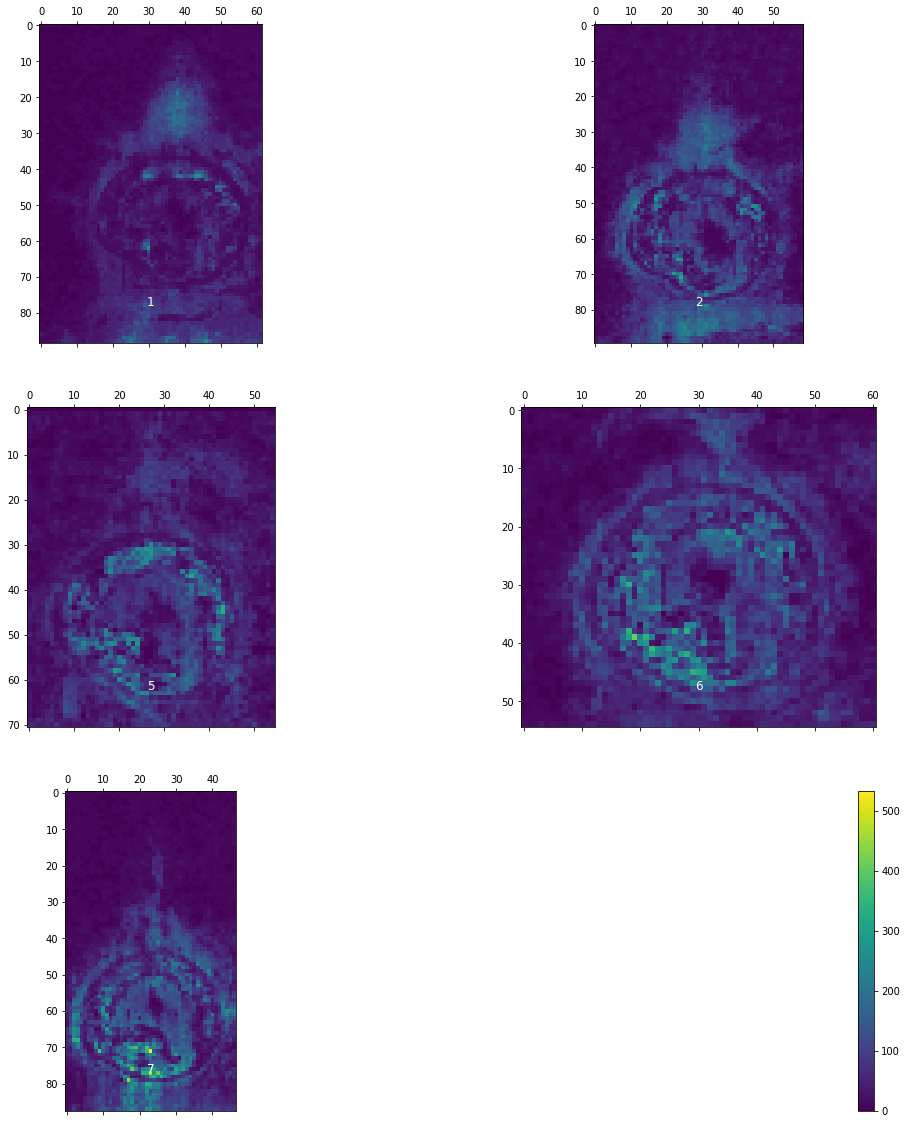

In [147]:
mpl.rcParams['figure.figsize'] = (18,20)
combSpec.mass_heatmap(sdfWeights.get_masses_for_protein(hgtest.loc[hgtest.TestSet == "Sterols [ST01]"].successGenes.values[0]), verbose=False, scaled=True)
mpl.rcParams['figure.figsize'] = (6,4)

# Glycerophosphocholines [GP01]
https://www.ahajournals.org/doi/10.1161/CIRCULATIONAHA.116.022993

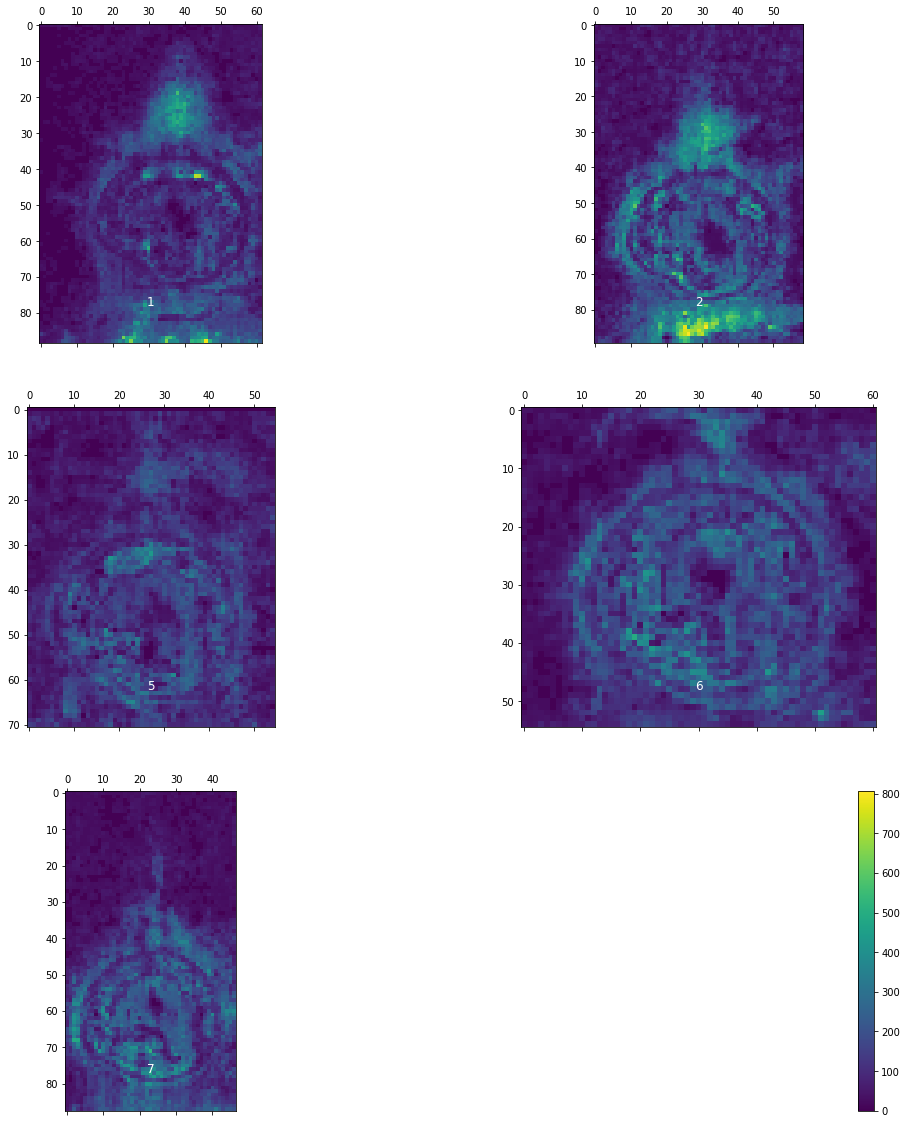

In [148]:
mpl.rcParams['figure.figsize'] = (18,20)
combSpec.mass_heatmap(sdfWeights.get_masses_for_protein(hgtest.loc[hgtest.TestSet == "Glycerophosphocholines [GP01]"].successGenes.values[0]), verbose=False, scaled=True)
mpl.rcParams['figure.figsize'] = (6,4)